In [3]:
import ftm
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
import time
import ftm_u_shape
import hitdifferentparts
import math
import librosa

In [4]:
sr = 44100
l0 = 1
m = 50
dur = 2**16
mu = np.arange(1,m+1) #(0,1,2,..,m-1)
x = 0.28 #strike posititon
E = 10
A = 0.19634*1e-6
I = 0.02454*1e-12
rho = 7800
d1 = 4e-3
d3 = 6e-5
T = 4000
Ts = 1/sr
tau = 1/sr*np.arange(1,dur+1)
h = 0.03

In [6]:
n = -(mu*math.pi/l0)**2 #eta 
K = np.sin(mu*math.pi*x/l0) #(m,1)
beta = E*I*(mu*math.pi/l0)**4 + T*(mu*math.pi/l0)**2 #(m,1)
alpha = (d1-d3*n**2)/(2*rho*A) #(m,1)
omega = beta/rho/A - ((d1-d3*n**2)/2/rho/A)**2 #(m,1)
gamma = n[:,None]**2*(E*A*math.pi**2/l0**4)*(Ts*np.sin(omega[:,None]*tau[None,:])/(rho*A*omega[:,None])) #(m,1)
N = l0/2
c0 = -np.exp(-2*alpha*Ts)
c1 = 2*np.exp(-alpha*Ts)*np.cos(omega*Ts)
a1 = 1
a0 = np.exp(-alpha*Ts)*(np.cos(omega*Ts)+(d1*d3+d3*n**2)/2/omega*np.sin(omega*Ts))


In [7]:
h=0.03
x=0.5
o_a = mu*math.pi*x
yi = h/(mu*math.pi)*np.cos(o_a)-h/(mu*math.pi)**2/x*np.sin(o_a)-2*h/(1-x)/(mu*math.pi)*np.cos(mu*math.pi) + \
     h*x/(1-x)/(mu*math.pi)*np.cos(o_a)-h/(1-x)/(mu*math.pi)**2*np.sin(o_a)+h/(1-x)/(mu*math.pi)*np.cos(o_a)


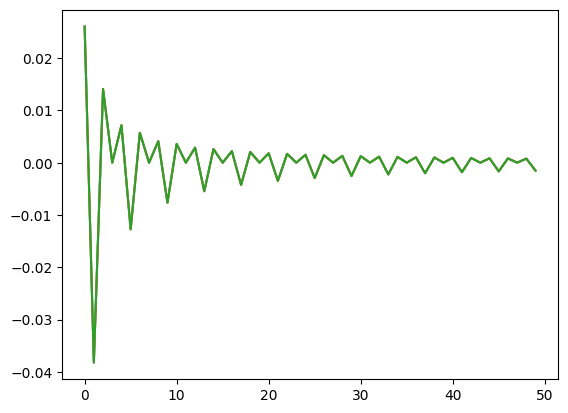

In [10]:
plt.plot(yi)
plt.show()

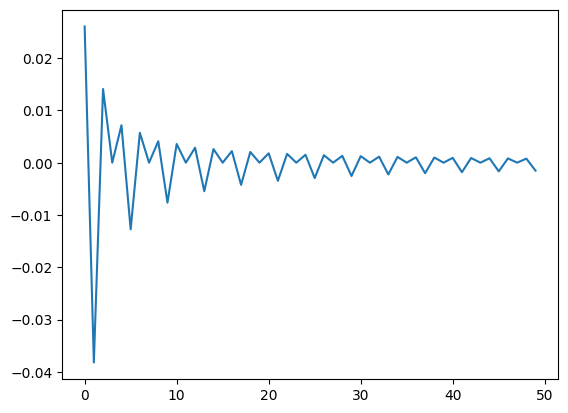

In [11]:
plt.plot(yi)
plt.show()

In [506]:

y_i = np.zeros(c0.shape)
y_ii = np.zeros(c0.shape)
y = []
summed = 0
node1 = 0
node2 = a1*yi+node1
for i in range(dur):
    #signal forward pass
    summed = np.sum((mu*node2)**2)
    #print(n,summed)
    #print("summed",n,np.sum(np.isnan(summed)),np.sum(summed))
    y.append(np.sum(node2*K/N)) #sum over all mode
    
    #update
    y_ii = y_i
    y_i = node2
    if i==0: #calculated for the current sample, but manifest in the next loop
        node1 = a0*yi+c0*y_ii+c1*y_i#+gamma[:,i]*summed
    elif i>0:
        node1 = c0*y_ii+c1*y_i#+gamma[:,i]*summed
    #print(n,np.sum(node1))
    
    
    node2 = node1
    #print(n,np.sum(node1))
   
    #print("node1",n,np.sum(np.isnan(node1)),np.sum(node1))
   


/Users/lilyh/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: overflow encountered in square
/Users/lilyh/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:21: RuntimeWarning: overflow encountered in multiply
/Users/lilyh/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in add
/Users/lilyh/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: overflow encountered in multiply
/Users/lilyh/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:13: RuntimeWarning: overflow encountered in true_divide
/Users/lilyh/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:21: RuntimeWarning: overflow encountered in add


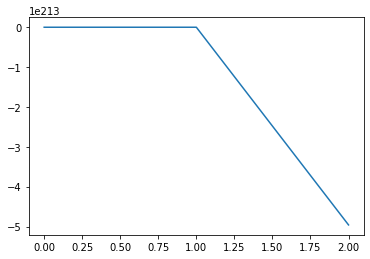

In [507]:
plt.plot(y)

In [491]:
ipd.Audio(y,rate=sr)

In [497]:
ipd.Audio(y,rate=sr)

In [912]:
def getsounds_dif_linear(m,x,h,A,rho,tau11,w11,p,D,l0,E,sr):
    
    #provide tau11, w11, p, D (rho,A)
    #compute S, c,T,d1, d3 (the d computed should be the real value scaled by 1/rhoA)
    S = ((D*w11)**2 + (p/tau11)**2)**0.25
    c_sq = (1-p**2)/tau11**2 + w11**2*(1-D**2)
    T = c_sq*rho*A
    d1 = 2*(1-p)/tau11*rho*A
    d3 = -2*p/tau11*rho*A
    EI = S**4*rho*A #but varying E wouldn't vary sound anymore, since E*I is fixed by other params
    
    #print(EI,d1,d3,T)
    
    
    # redefine everything as the paper did
    A = 0.19634*1e-6
    I = 2.454*1e-14
    rho = 7800
    E = 190*1e+9
    d1 = 4e-3 #unit kg/(ms)
    d3 = -6e-6 #the bigger magnitude it is the sharper
    T = 200
    l0 = 1
    EI = E*I
    
       
        
    mu = np.arange(1,m+1) #(0,1,2,..,m-1)
    dur = 2**17
    Ts = 1/sr
    tau = 1/sr*np.arange(1,dur+1)

    n = -(mu*math.pi/l0)**2 #eta 
    K = np.sin(mu*math.pi*x/l0) #(m,1)
    
    beta = EI*(n**2) + T*(-n) #(m,1)
    #alpha = (d1-d3*n)/(2*rho*A) #linear
    alpha = (d1+d3*n)/(2*rho*A) # nonlinear
    omega = np.sqrt(np.abs(beta/rho/A - ((d1+d3*n)/2/rho/A)**2)) #nonlinear
    #print(omega,beta/rho/A - ((d1+d3*n)/2/rho/A)**2)
    N = l0/2
    c0 = -np.exp(-2*alpha*Ts)
    c1 = 2*np.exp(-alpha*Ts)*np.cos(omega*Ts)
    a1 = 1 #term a1 neither
    #term a0 doesn't affect much of the final solution, since it's only applied on one sample?
    a0 = np.exp(-alpha*Ts)*(np.cos(omega*Ts)+(d1*d3+d3*n)/(2*omega)*np.sin(omega*Ts))
    #a0 = Ts*np.sin(omega*Ts)/(omega*Ts)
    #a0 = l0/2*np.sin(mu*math.pi*x/l0)**2*np.sin(omega*Ts)/(rho*A*omega)
    print(a0)
    o_a = mu*math.pi*x
    yi = h/(mu*math.pi)*np.cos(o_a)-h/(mu*math.pi)**2/x*np.sin(o_a)-2*h/(1-x)/(mu*math.pi)*np.cos(mu*math.pi) + \
     h*x/(1-x)/(mu*math.pi)*np.cos(o_a)-h/(1-x)/(mu*math.pi)**2*np.sin(o_a)+h/(1-x)/(mu*math.pi)*np.cos(o_a)
    #h affects tension, but tension is given, that's why varing height doesn't change much
   
    y_i = np.zeros(c0.shape)
    y_ii = np.zeros(c0.shape)
    y = []
    summed = 0
    node1 = 0
    node2 = a1*yi+node1
    dur_excit = 1
    for i in range(dur):
        #signal forward pass
        y.append(np.sum(node2*K/N)) #sum over all mode

        #update
        y_ii = y_i
        y_i = node2  #continuing with excitation
        if i<dur_excit: #calculated for the current sample, but manifest in the next loop
            node1 = a0*yi+c0*y_ii+c1*y_i
        elif i>=dur_excit:
            a1 = 0
            node1 = c0*y_ii+c1*y_i
        #print(gamma*summed,node1)
        #print(np.sum(summed),np.sum(gamma))
    


        node2 = node1
      
    return y

    

[ 9.99638527e-01  9.98642253e-01  9.96979490e-01  9.94646785e-01
  9.91639328e-01  9.87950970e-01  9.83574245e-01  9.78500411e-01
  9.72719483e-01  9.66220278e-01  9.58990472e-01  9.51016655e-01
  9.42284396e-01  9.32778320e-01  9.22482188e-01  9.11378983e-01
  8.99451010e-01  8.86680000e-01  8.73047225e-01  8.58533620e-01
  8.43119916e-01  8.26786784e-01  8.09514981e-01  7.91285519e-01
  7.72079832e-01  7.51879960e-01  7.30668739e-01  7.08430008e-01
  6.85148820e-01  6.60811667e-01  6.35406713e-01  6.08924038e-01
  5.81355892e-01  5.52696959e-01  5.22944624e-01  4.92099259e-01
  4.60164503e-01  4.27147559e-01  3.93059490e-01  3.57915520e-01
  3.21735337e-01  2.84543402e-01  2.46369246e-01  2.07247776e-01
  1.67219568e-01  1.26331152e-01  8.46352949e-02  4.21912598e-02
 -9.34942911e-04 -4.46703279e-02]


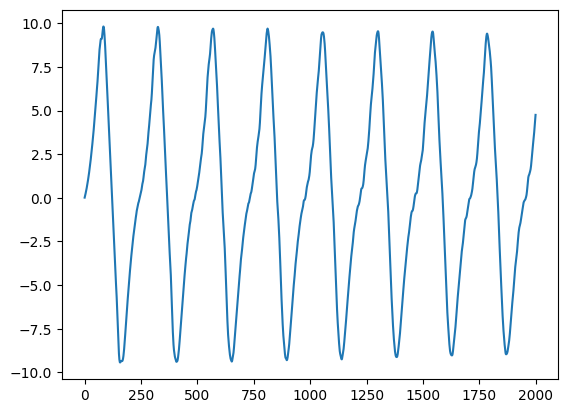

In [918]:
mode=50
y2 = getsounds_dif_linear(m=mode,x=0.28,h=0.03,A=0.19634*1e-6,
                             rho=7800,tau11=tau,w11=w,p=p,D=D,l0=math.pi,
                             E=E,sr=44100)
display(ipd.Audio(y2,rate=sr)) 
plt.plot(y2[:2000])
plt.show()
#sf.write("linstring_paper_1.wav",y2/max(y2),sr)

In [974]:
def getsounds_dif_nonlinear(m,x,h,A,rho,tau11,w11,p,D,l0,E,sr):
    
    #provide tau11, w11, p, D (rho,A)
    #compute S, c,T,d1, d3 (the d computed should be the real value scaled by 1/rhoA)
    S = ((D*w11)**2 + (p/tau11)**2)**0.25
    c_sq = (1-p**2)/tau11**2 + w11**2*(1-D**2)
    T = c_sq*rho*A
    d1 = 2*(1-p)/tau11*rho*A
    d3 = -2*p/tau11*rho*A
    EI = S**4*rho*A #but varying E wouldn't vary sound anymore, since E*I is fixed by other params
    print("I",EI/E,d1,d3,T)
    
    #print(EI,d1,d3,T)
    
    # redefine everything as the paper did
    A = 0.19634*1e-6
    I = 2.454*1e-14
    rho = 7800
    E = 190*1e+9
    d1 = 4e-3 #unit kg/(ms)
    d3 = -6e-6 #the smaller magnitude it is the sharper
    T = 200
    l0 = 1
    EI = E*I
    
    
    mu = np.arange(1,m+1) #(1,2,..,m)
    dur = 2**17
    Ts = 1/sr
    tau = 1/sr*np.arange(1,dur+1)

    n = -(mu*math.pi/l0)**2 #eta 
    K = np.sin(mu*math.pi*x/l0) #(m,1)
    
    beta = EI*(n**2) + T*(-n) #(m,1)    
    #alpha = (d1-d3*n)/(2*rho*A) #linear
    alpha = (d1+d3*n)/(2*rho*A) # nonlinear
    omega = np.sqrt(np.abs(beta/rho/A - ((d1+d3*n)/2/rho/A)**2)) #nonlinear
    #print(omega,alpha)
    #omega = np.sqrt((S**4-(d3/rho/A)**2/4)*n**2+(c_sq+d1*d3/(rho*A)**2/2)*(-n)-d1**2/(2*rho*A)**2) #linear
    #print(omega,beta)    
    #gamma = n*(math.pi**2*Ts*E*A/l0**4)*np.exp(-alpha)*np.sin(omega*Ts) #from the book
    #gamma = n[:,None]*(E*A*math.pi**2/l0**4)*(Ts*np.sin(omega[:,None]*tau[None,:])/(rho*A*omega[:,None]))
    #gamma = n*(E*A*math.pi**2/l0**4)*(Ts*np.sin(omega*Ts)/(rho*A*omega))*Ts #this value is negligibly small
    #postulated from 2d paper
    gamma = n*(E*A*math.pi**2/l0**4)*(np.sin(omega*Ts)/(rho*A*omega))*np.exp(-alpha*Ts)*Ts**2 #this value is negligibly small
    #gamma = n*(E*A*math.pi**2/l0**4)
    #print(gamma,omega,alpha) 
    N = l0/2
    c0 = -np.exp(-2*alpha*Ts)
    c1 = 2*np.exp(-alpha*Ts)*np.cos(omega*Ts)
    a1 = 1
    a0 = np.exp(-alpha*Ts)*(np.cos(omega*Ts)+(d1*d3+d3*n)/2/omega*np.sin(omega*Ts))

    o_a = mu*math.pi*x
    yi = h/(mu*math.pi)*np.cos(o_a)-h/(mu*math.pi)**2/x*np.sin(o_a)-2*h/(1-x)/(mu*math.pi)*np.cos(mu*math.pi) + \
     h*x/(1-x)/(mu*math.pi)*np.cos(o_a)-h/(1-x)/(mu*math.pi)**2*np.sin(o_a)+h/(1-x)/(mu*math.pi)*np.cos(o_a)
    
   
    y_i = np.zeros(c0.shape)
    y_ii = np.zeros(c0.shape)
    y = []
    summed = 0
    node1 = 0
    node2 = a1*yi+node1
    dur_excit = 1
    debug =[]
    for i in range(dur):
        #signal forward pass
        summed = np.sum((mu*node2)**2)
        debug.append(summed)
        #print(n,summed)
        #print("summed",gamma*summed,gamma,summed,node2)
        #print("gamma effects",gamma,summed)
        y.append(np.sum(node2*K/N)) #sum over all mode

        #update
        y_ii = y_i
        y_i = node2
        if i < dur_excit: #calculated for the current sample, but manifest in the next loop
            yi = yi*(dur_excit-i-1)/dur_excit
            node1 = a0*yi+c0*y_ii+c1*y_i+gamma*summed*(y_i)**2
        elif i >= dur_excit:
            node1 = c0*y_ii+c1*y_i+gamma*summed*(y_i)**2
        #print(gamma*summed,node1)
        #print(np.sum(summed),np.sum(gamma))
        node2 = node1
      
    return y,debug

    

I 6.100821151578948e-11 0.006125807999999999 0.0 3.7290856199999993
[ 9.99638527e-01  9.98642253e-01  9.96979490e-01  9.94646785e-01
  9.91639328e-01  9.87950970e-01  9.83574245e-01  9.78500411e-01
  9.72719483e-01  9.66220278e-01  9.58990472e-01  9.51016655e-01
  9.42284396e-01  9.32778320e-01  9.22482188e-01  9.11378983e-01
  8.99451010e-01  8.86680000e-01  8.73047225e-01  8.58533620e-01
  8.43119916e-01  8.26786784e-01  8.09514981e-01  7.91285519e-01
  7.72079832e-01  7.51879960e-01  7.30668739e-01  7.08430008e-01
  6.85148820e-01  6.60811667e-01  6.35406713e-01  6.08924038e-01
  5.81355892e-01  5.52696959e-01  5.22944624e-01  4.92099259e-01
  4.60164503e-01  4.27147559e-01  3.93059490e-01  3.57915520e-01
  3.21735337e-01  2.84543402e-01  2.46369246e-01  2.07247776e-01
  1.67219568e-01  1.26331152e-01  8.46352949e-02  4.21912598e-02
 -9.34942911e-04 -4.46703279e-02]
I 6.100821151578948e-11 0.006125807999999999 0.0 3.7290856199999993


/Users/lilyh/anaconda3/envs/openl3/lib/python3.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning: overflow encountered in multiply
/Users/lilyh/anaconda3/envs/openl3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/lilyh/anaconda3/envs/openl3/lib/python3.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in multiply
/Users/lilyh/anaconda3/envs/openl3/lib/python3.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in add


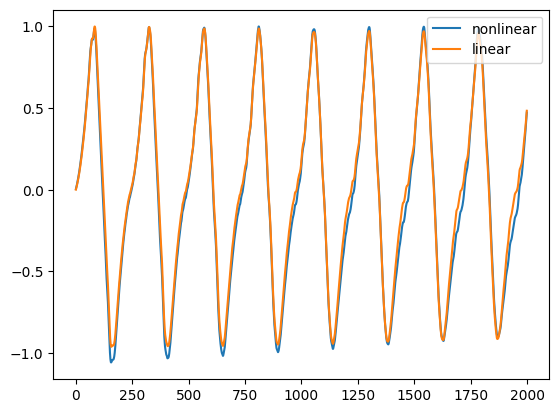

In [975]:
w = 100
tau = 0.5 #the longer tau is the more nonlinear effects, but more unstable
p = 0 #smaller p is more nonlinear effects? but more unstable
D = 0.87
x0 = 0.28
E = 190*1e+9 #this affects nonlinear effect
#when it's small, nonlinear effect is negligible, but when it's big, the solution explodes, why??
mode = 50 #higher mode's nonlinear behavior is unstable, gamma effect tends to explode
y1,debug3 = getsounds_dif_nonlinear(m=mode,x=x0,h=0.03,A=0.19634*1e-6,
                             rho=7800,tau11=tau,w11=w,p=p,D=D,l0=math.pi,
                             E=E,sr=44100)

y2 = getsounds_dif_linear(m=mode,x=x0,h=0.03,A=0.19634*1e-6,
                             rho=7800,tau11=tau,w11=w,p=p,D=D,l0=math.pi,
                             E=E,sr=44100)

y3,debug3 = getsounds_dif_nonlinear(m=mode,x=x0,h=0.06,A=0.19634*1e-6,
                             rho=7800,tau11=tau,w11=w,p=p,D=D,l0=math.pi,
                             E=E,sr=44100)


display(ipd.Audio(y1,rate=sr))#nonlinear and using impulse invariant transformation to discretize
display(ipd.Audio(y2,rate=sr)) #linear but using impulse invariant transformation to discretize
#y4 = getsounds_dif(m=mode,w11=w,tau11=tau,p=p,D=D,sr=44100,x=x0)
display(ipd.Audio(y3,rate=sr))# linear but using bilinear transformation to discretize
plt.plot(y1[:2000]/max(y1),label="nonlinear")
plt.plot(y2[:2000]/max(y2),label="linear")
plt.legend()
plt.show()
sf.write("nonlinearstring2_h003.wav",y1/max(y1),sr)
sf.write("nonlinearstring2_h006.wav",y3/max(y3),sr)
sf.write("linearstring2_h006.wav",y2/max(y2),sr)

#sf.write("nonlinear_w2000_tau09_p06_D02_x03_E9_m10.wav",y1/max(y1),sr)
#sf.write("linear_w2000_tau09_p06_D02_x03_E9_m10.wav",y2/max(y2),sr)
#sf.write("linearivan_w2000_tau09_p06_D02_x03_E9_m10.wav",y4/max(y4),sr)


In [907]:
plt.plot(debug[:50],label="E = 190") # the summed amount over time, for E = 190
plt.plot(debug2[:50],label="E = 190e+3")# for E = 190e+3
plt.plot(debug3[:50],label="E = 190e+6") # E = 190e+6
plt.legend()
plt.show()


In [453]:
w = 600
tau = 1
p = 0.3
D = 0.7
x0 = 0.3
mode = 5
E = 190*1e+8

y1 = getsounds_dif_nonlinear(m=mode,x=x0*math.pi,h=0.03,A=0.19634*1e-6,
                             rho=7800,tau11=tau,w11=w,p=p,D=D,l0=math.pi,
                             E=E,sr=44100)
y2 = getsounds_dif_linear(m=mode,x=x0*math.pi,h=0.03,A=0.19634*1e-6,
                             rho=7800,tau11=tau,w11=w,p=p,D=D,l0=math.pi,
                             E=E,sr=44100)

display(ipd.Audio(y1,rate=sr))
display(ipd.Audio(y2,rate=sr))
y4 = getsounds_dif(m=mode,w11=w,tau11=tau,p=p,D=D,sr=44100,x=x0)
display(ipd.Audio(y4,rate=sr))
#sf.write("nonlinear_string_sound.wav",y1/max(y1),sr)
#sf.write("linear_string_paper_sound.wav",y2/max(y2),sr)
#sf.write("linear_string_note_sound.wav",y4/max(y4),sr)

I 1.4218330033193682e-08 0.0021440327999999995 -0.0009188711999999999 281.17598082131997
[  600.          1885.94842718  3992.59363322  6935.12850277
 10716.34320839] [1.  1.9 3.4 5.5 8.2]
[0.99988476 0.99904262 0.99582763 0.98753691 0.97043954]


In [448]:
w = 1200
tau = 1
p = 0.5
D = 0.1
x0 = 0.28
mode = 13
y1 = getsounds_dif_nonlinear(m=mode,x=x0*math.pi,h=0.03,A=0.19634*1e-6,
                             rho=7800,tau11=tau,w11=w,p=p,D=D,l0=math.pi,
                             E=190,sr=44100)
y2 = getsounds_dif_linear(m=mode,x=x0*math.pi,h=0.03,A=0.19634*1e-6,
                             rho=7800,tau11=tau,w11=w,p=p,D=D,l0=math.pi,
                             E=190,sr=44100)

display(ipd.Audio(y1,rate=sr))
display(ipd.Audio(y2,rate=sr))
y4 = getsounds_dif(m=mode,w11=w,tau11=tau,p=p,D=D,sr=44100,x=x0)
display(ipd.Audio(y4,rate=sr))
#sf.write("nonlinear_string_sound2.wav",y1/max(y1),sr)
#sf.write("linear_string_paper_sound2.wav",y2/max(y2),sr)
#sf.write("linear_string_note_sound2.wav",y4/max(y4),sr)

I 0.11606995612105259 0.0015314519999999998 -0.0015314519999999998 2183.2391197889997
[ 1200.          2435.73412958  3741.23001164  5147.42690575
  6681.31768441  8365.64455078 10219.04163804 12256.46016393
 14489.72118434 16928.08390663 19578.76477207 22447.3792624
 25538.30147054] [ 1.   2.5  5.   8.5 13.  18.5 25.  32.5 41.  50.5 61.  72.5 85. ]
[0.99960712 0.99841843 0.99629054 0.99300406 0.98825344 0.98164887
 0.97271942 0.96091749 0.94562539 0.9261643  0.90180631 0.87179016
 0.83534124]


In [449]:
w = 1200
tau = 1
p = 0.3
D = 0.7
x0 = 0.5
mode = 5
y1 = getsounds_dif_nonlinear(m=mode,x=x0*math.pi,h=0.03,A=0.19634*1e-6,
                             rho=7800,tau11=tau,w11=w,p=p,D=D,l0=math.pi,
                             E=190*1e+8,sr=44100)
y2 = getsounds_dif_linear(m=mode,x=x0*math.pi,h=0.03,A=0.19634*1e-6,
                             rho=7800,tau11=tau,w11=w,p=p,D=D,l0=math.pi,
                             E=190*1e+8,sr=44100)

display(ipd.Audio(y1,rate=sr))
display(ipd.Audio(y2,rate=sr))
y4 = getsounds_dif(m=mode,w11=w,tau11=tau,p=p,D=D,sr=44100,x=x0)
display(ipd.Audio(y4,rate=sr))

I 5.68732983700358e-08 0.0021440327999999995 -0.0009188711999999999 1124.6997424213198
[ 1200.          3771.89626978  7985.18653007 13870.25621068
 21432.68559374] [1.  1.9 3.4 5.5 8.2]
[0.99960713 0.99630153 0.98357564 0.95082676 0.88404275]


In [69]:
y1 = getsounds_dif_nonlinear(m=50,x=0.3*math.pi,h=0.03,A=0.19634*1e-6,
                             rho=7800,tau11=1,w11=1200,p=0.3,D=0.7,l0=math.pi,
                             E=190,sr=44100)

display(ipd.Audio(y1,rate=sr))

In [70]:
y1 = getsounds_dif_nonlinear(m=50,x=0.3*math.pi,h=0.03,A=0.19634*1e-6,
                             rho=7800,tau11=1,w11=1200,p=0.3,D=0.7,l0=math.pi,
                             E=10,sr=44100)
y4 = getsounds_dif(m=50,w11=1200,tau11=1,p=0.3,D=0.7,sr=44100,x=0.01)
y5 = getsounds_dif(m=50,w11=1200,tau11=1,p=0.3,D=0.7,sr=44100,x=0.3)


display(ipd.Audio(y1,rate=sr))
display(ipd.Audio(y4,rate=sr))
display(ipd.Audio(y5,rate=sr))

In [22]:
import soundfile as sf
y3 = getsounds_dif_nonlinear(m=50,x=0.4*math.pi,h=0.01,A=0.19634*1e-6,
                             rho=7800,tau11=1,w11=2000,p=0.3,D=0.7,l0=math.pi,
                             E=10,sr=44100)
ipd.Audio(y3/max(y3),rate=sr)
#sf.write("nonlinear_string_ex1.wav",y3,sr)

In [25]:
y4 = getsounds_dif(m=50,w11=2000,tau11=1,p=0.3,D=0.7,sr=44100,x=0.28)
ipd.Audio(y4,rate=sr)

In [906]:
y2 = getsounds_dif(m=50,w11=2000,tau11=1,p=0.3,D=0.7,sr=44100,x=0.4)
ipd.Audio(y2,rate=sr)
#sf.write("linear_string_ex1.wav",y2/max(y2),sr)

In [894]:
y4 = getsounds_dif(m=50,w11=2000,tau11=1,p=0.3,D=0.7,sr=44100,x=0.28)
ipd.Audio(y4,rate=sr)

In [33]:
plt.plot(y3[:2000]/max(y3))
plt.plot(y2[:2000]/max(y2))

NameError: name 'y2' is not defined

In [722]:
ipd.Audio(y2,rate=sr)

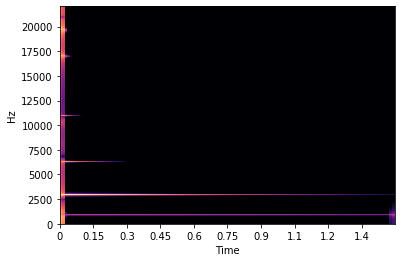

In [759]:
from librosa.display import specshow

S = librosa.amplitude_to_db(np.abs(librosa.stft(np.array(y3))))
specshow(S, sr=sr, x_axis="time", y_axis="hz")

In [755]:
plt.plot(y3)

In [449]:
y1 = getsounds_dif_nonlinear(m=50,x=0.5,E=190,A=0.19634*1e-6,I=0.02454*1e-12,
                             rho=7800,d1=4,d3=6e-5,T=1000,h=0.03,sr=44100)
ipd.Audio(y1,rate=sr)

## Linear string

In [888]:
def getsigma(m,p,s11):        
    sigma = s11 * (1 + p * (m**2 - 1))
    return sigma

def getomega(m,p,D,w11,s11):
    omega_sq = D**2 * w11**2 * m**2 + (s11**2 * (1 - p)**2 + w11**2 * (1 - D**2)) - s11**2 * (1 - p)**2
    return np.sqrt(omega_sq)
    

def getk(m,omega,f,x):
    k = f * np.sin(m * np.pi*x)/omega #assuming x1,x2 at center of the surface
    #print(np.sum(k))
    return k

#calculate integral and approximate excitation function with gaussian distribution
def getf(m,l,tau,mode='gaus'): #calculate the f_m which takes spatial component of excitation.
    #trapezoid rule to integrate f(x)sin(mpix) from 0 to l
    #(f(a)+f(b))*(b-a)/2
    integral = 0
    h = l/tau
    if mode == "gaus":
        x = approxnorm(l,l/2,0.4,tau) #f(x)
    elif mode == "tri":
        x = np.arange(0,tau+1,1)*h
        x = np.minimum(2-2/l*x,2*x/l)
    elif mode == "delta":
        x = np.zeros(tau+1)
        x[tau//2] = 1
    elif mode == "random":
        x = np.random.rand(tau+1)

    for i in range(tau):
        #x(i+2)
        #print(x.shape,x[0],x[0,1])
        integral = integral + (x[i] * np.sin(m * np.pi * i * h/l) + x[i+1] * np.sin(m * np.pi * (i + 1) * h/l))*h/2
    integral = integral*2/l
    return integral


def approxnorm(l,mu,s,tau): #normal distribution simulating fx 
    h = l/tau
    #x = np.zeros((1,tau + 1))
    x = []
    for i in range(tau+1):
        #x[i] = 1/(s * np.sqrt(2*np.pi)) * np.exp(-0.5 * (i * h - mu)**2/s**2)
        x.append(1/(s * np.sqrt(2*np.pi)) * np.exp(-0.5 * (i * h - mu)**2/s**2))

    return x

def getsounds_dif(m,w11,tau11,p,D,sr,x):
    l = np.pi
    s11 = -1/tau11

    sigma=np.zeros(m)
    omega=np.zeros(m)
    k=np.zeros(m)

    x1 = 1
    x2 = l*alpha/2


    for i in range(m):
        sigma[i] = getsigma(i+1,p,s11)
        omega[i] = getomega(i+1,p, D,w11,s11)

        k[i] = getk(i+1,omega[i],getf(i+1,1,300),x)
            #k[i,j] = get_del_k(i+1,j+1,omega[i,j],x1,x2,l,alpha)



    dur = 2**16
    y_1 = np.zeros((m,))
    y_2 = np.zeros((m,))
    x_1 = 0.0
    x_0 = 1
    y_iii = []
    for n in range(dur):
        
        #each sigma, omega corresponds to a matrix of modes, thus when updating need a matrix of y values
        ytemp = 2*np.exp(sigma/sr)*np.cos(omega/sr)*y_1-np.exp(2*sigma/sr)*y_2+np.exp(sigma/sr)*np.sin(omega/sr)*k*x_1
        #ytemp = 2*np.exp(sigma/sr)*np.cos(omega/sr)*y_1-np.exp(2*sigma/sr)*y_2+np.exp(sigma/sr)/omega*np.sin(omega/sr)*x_1 #with impulse
        y_iii.append(np.sum(np.sum(ytemp)))
     
        x_1 = x_0
        x_0 = 0.0
        y_2 = y_1
        y_1 = ytemp
            
    return y_iii


In [893]:
y = getsounds_dif(m=10,w11=1500,tau11=0.5,p=0.5,D=1.2,sr=44100,x=0.28)
ipd.Audio(y,rate=sr)

In [608]:
y = getsounds_dif(m=50,w11=1000,tau11=0.2,p=0.2,D=1.2,sr=44100,x=0.4)
ipd.Audio(y,rate=sr)